In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import cv2
import imutils

%matplotlib inline

# Data Loading and Processing

In [18]:
transform = transforms.Compose([
                transforms.Resize(28),
                transforms.ToTensor(),
    transforms.Normalize([0.5,],[0.5,])])

train_data = datasets.FashionMNIST(root="./data",train=True,transform=transform,download=True)
test_data= datasets.FashionMNIST(root = "./data", train=False,transform=transform,download=True)

In [19]:
train_loader = DataLoader(train_data,batch_size=64,shuffle=True)
test_loader =  DataLoader(test_data,batch_size=128)

In [20]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
w = 28
h = 28
num_classes = len(classes)

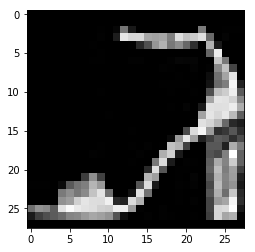

In [22]:
images,labels = next(iter(train_loader))

plt.imshow(images[0][0], cmap = "Greys_r")

# Creating the Network

# Output Size = ((W-F)/S) + 1

<h3>
W: Input Size <br/>
F: Filter-Kernel Size <br/>
S: Strides<br/></h3>

In [28]:
model = nn.Sequential(
    nn.Conv2d(in_channels = 1 , out_channels = 10,kernel_size = 3),  #OutDim (28-3)/1 + 1  = (10,26,26)
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2,stride=2), #OurDim (10,13,13)

    
    nn.Conv2d(in_channels = 10, out_channels = 20,kernel_size = 3),  #OutDim (13 - 3)/1 + 1 = (20,11,11)
    nn.ReLU(),
    nn.MaxPool2d(2,2), #OutDim  11/2 = 5.5 = (20,5,5)
    
    nn.Dropout(0.5),
      
    nn.Flatten(),
    nn.Linear(in_features = 20*5*5,out_features = num_classes),
    nn.LogSoftmax())

In [31]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

# Model Training

In [32]:
from sklearn.metrics import accuracy_score

def calc_test_accuracy():
    accuracies = []
    losses = []
    with torch.no_grad():
        for images,labels in iter(test_loader):
            output = model.forward(images)
            accuracies.append(accuracy_score(labels,output.max(dim =1)[1]))
            loss = criterion(output,labels)
            losses.append(loss.item())
    return np.mean(accuracies),np.mean(losses)

In [33]:
epochs = 20
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images,labels in iter(train_loader):
        steps += 1
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0
    test_acc,test_loss = calc_test_accuracy()
    print("Testing set accuracy: " + str(test_acc) +", Testing set loss:" + str(test_loss))

Epoch: 1/20...  Loss: 2.0495
Epoch: 1/20...  Loss: 1.2007
Epoch: 1/20...  Loss: 0.9343
Epoch: 1/20...  Loss: 0.8585
Epoch: 1/20...  Loss: 0.7706
Epoch: 1/20...  Loss: 0.7366
Epoch: 1/20...  Loss: 0.7288
Epoch: 1/20...  Loss: 0.6789
Epoch: 1/20...  Loss: 0.6358
Epoch: 1/20...  Loss: 0.6464
Epoch: 1/20...  Loss: 0.6038
Epoch: 1/20...  Loss: 0.6219
Epoch: 1/20...  Loss: 0.6250
Epoch: 1/20...  Loss: 0.5943
Epoch: 1/20...  Loss: 0.5728
Epoch: 1/20...  Loss: 0.5865
Epoch: 1/20...  Loss: 0.5901
Epoch: 1/20...  Loss: 0.5845
Epoch: 1/20...  Loss: 0.5735
Epoch: 1/20...  Loss: 0.5535
Epoch: 1/20...  Loss: 0.5908
Epoch: 1/20...  Loss: 0.5520
Epoch: 1/20...  Loss: 0.5539
Testing set accuracy: 0.7952927215189873, Testing set loss:0.5547652887769893
Epoch: 2/20...  Loss: 0.2900
Epoch: 2/20...  Loss: 0.5294
Epoch: 2/20...  Loss: 0.5270
Epoch: 2/20...  Loss: 0.5174
Epoch: 2/20...  Loss: 0.5403
Epoch: 2/20...  Loss: 0.5489
Epoch: 2/20...  Loss: 0.5238
Epoch: 2/20...  Loss: 0.5089
Epoch: 2/20...  Loss: 0

In [34]:
torch.save(model.state_dict(),"mode.dict")

In [35]:
model.load_state_dict("mode.dict")

# Model Testing

In [46]:
images,labels = next(iter(test_loader))

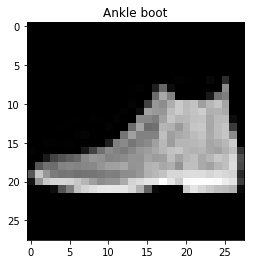

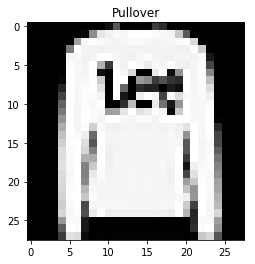

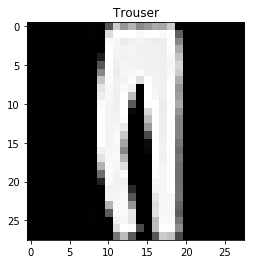

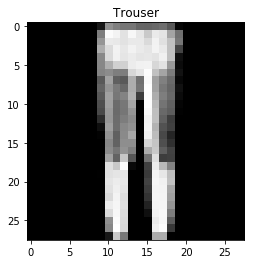

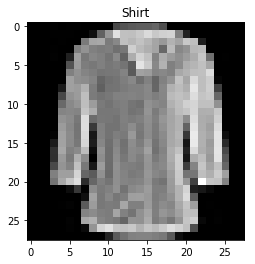

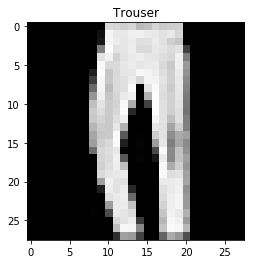

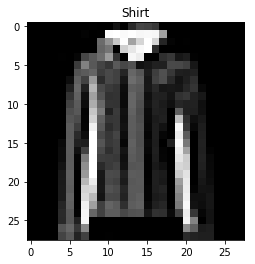

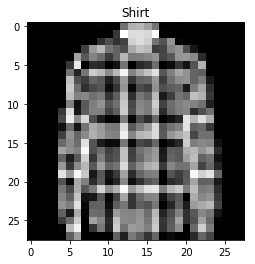

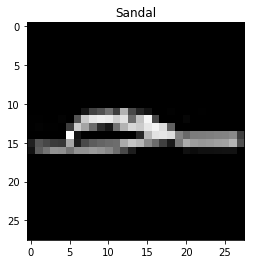

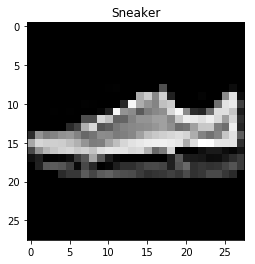

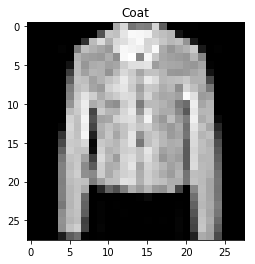

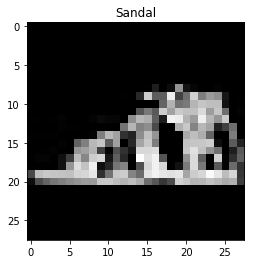

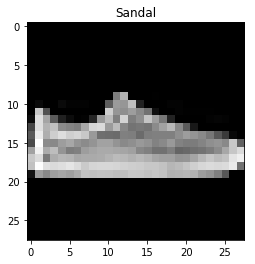

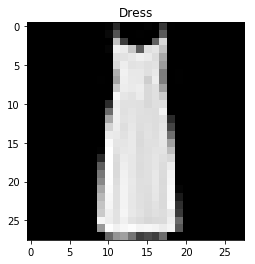

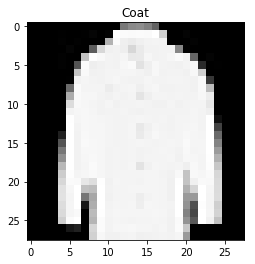

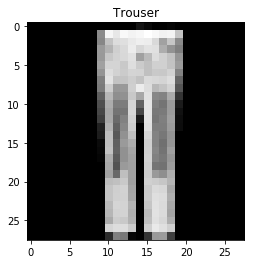

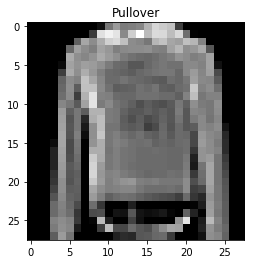

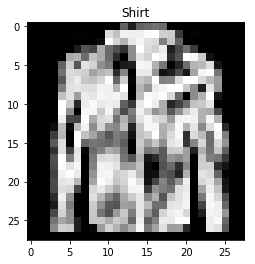

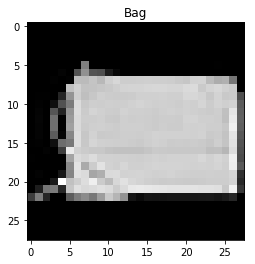

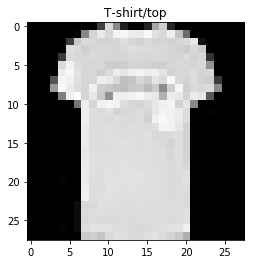

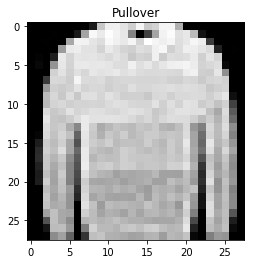

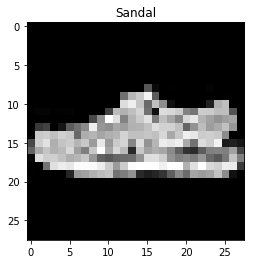

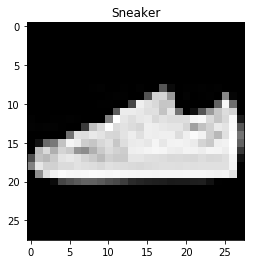

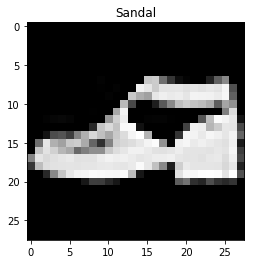

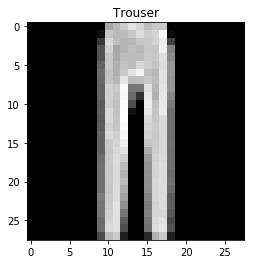

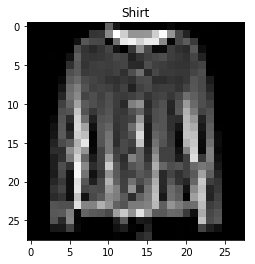

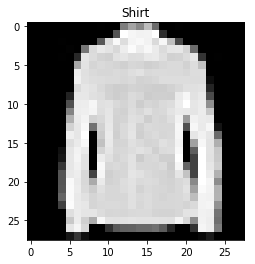

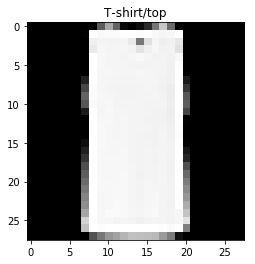

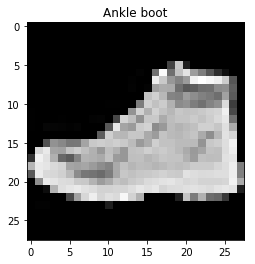

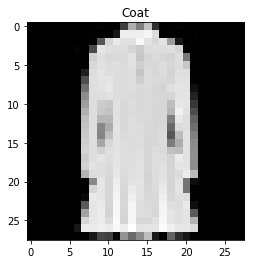

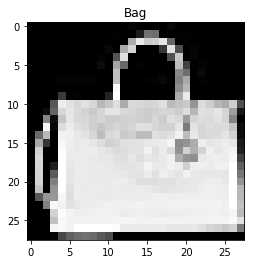

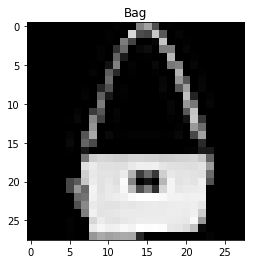

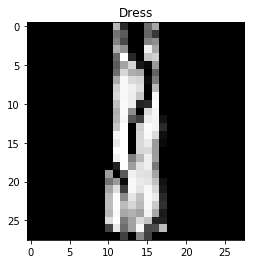

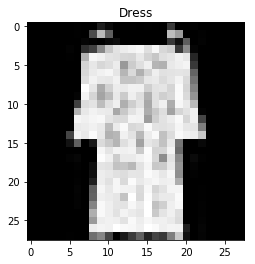

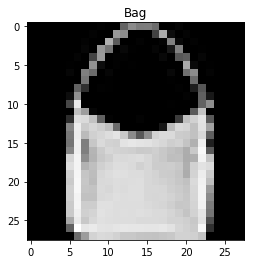

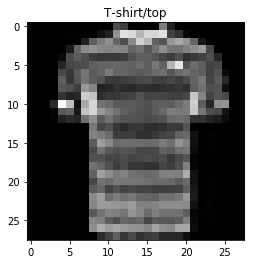

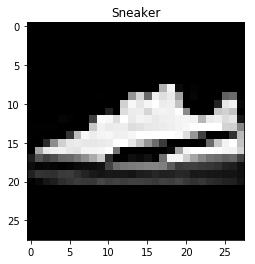

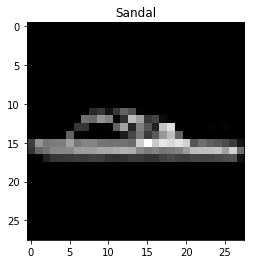

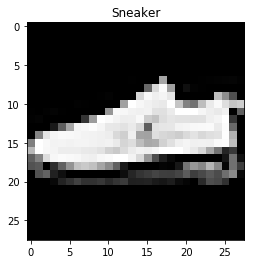

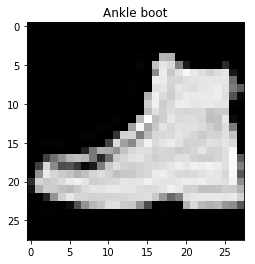

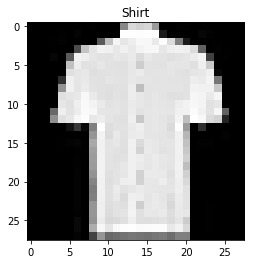

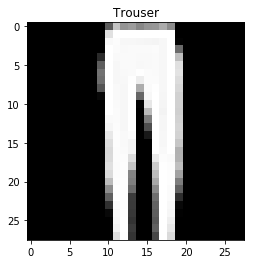

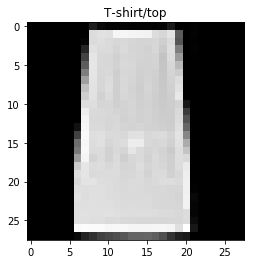

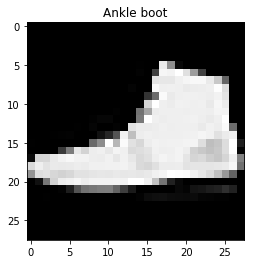

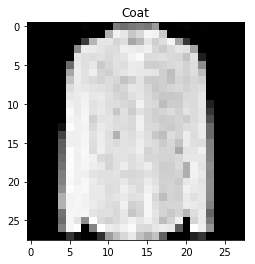

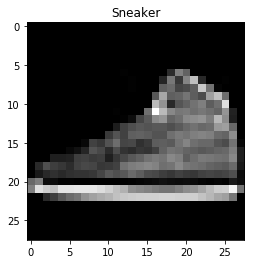

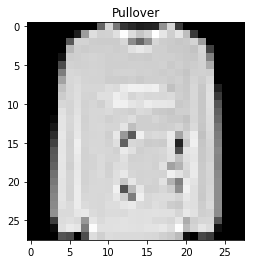

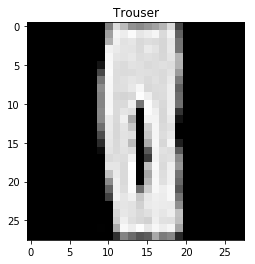

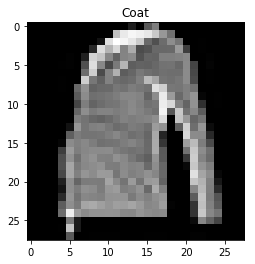

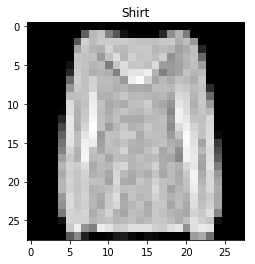

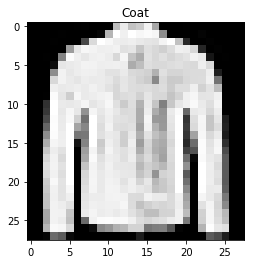

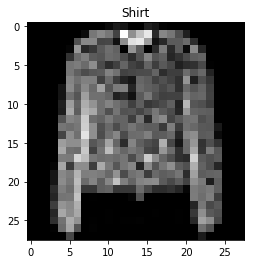

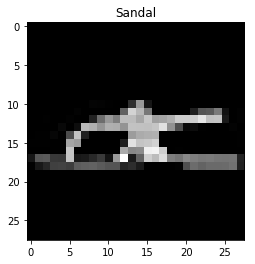

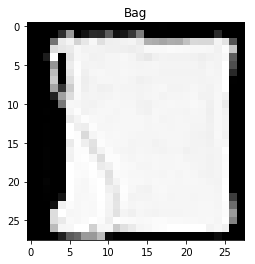

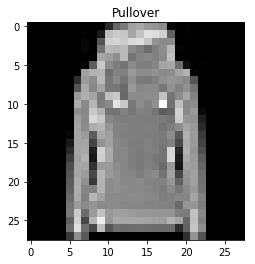

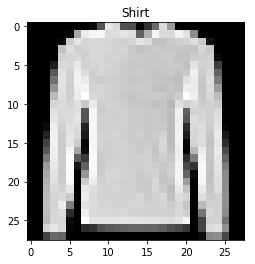

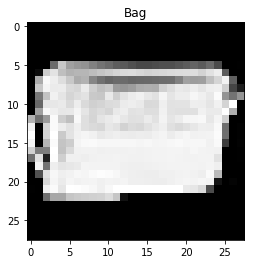

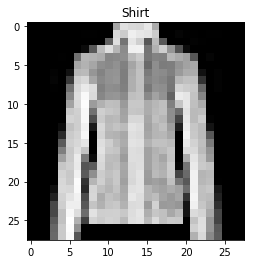

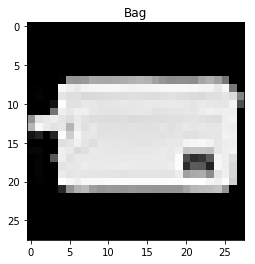

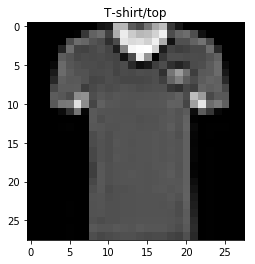

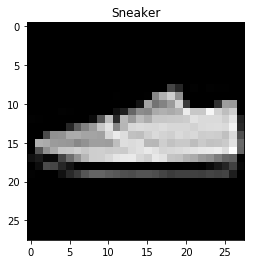

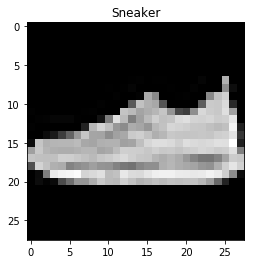

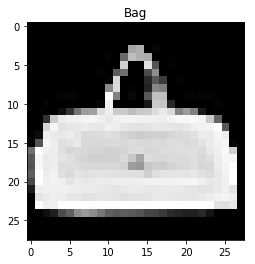

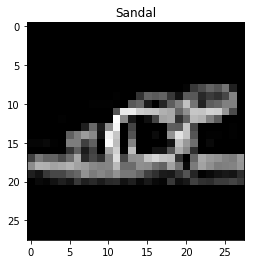

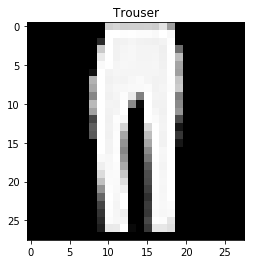

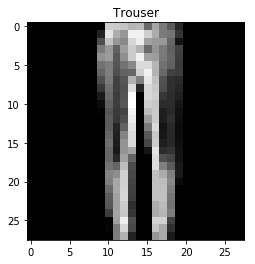

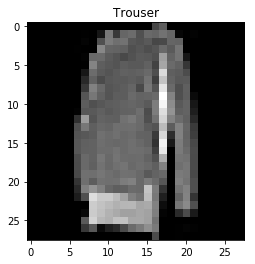

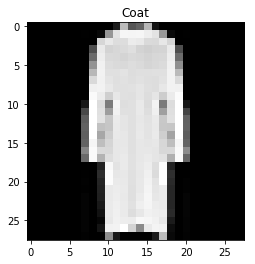

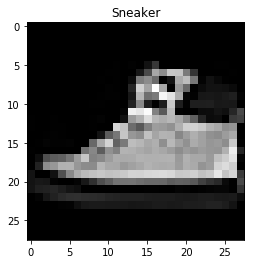

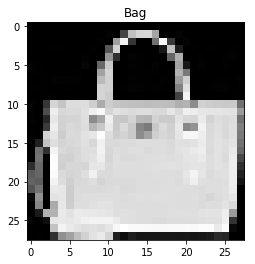

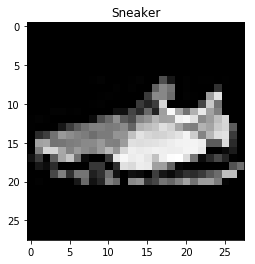

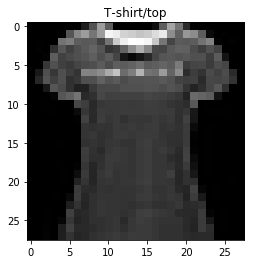

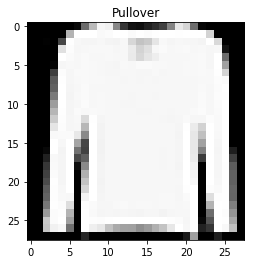

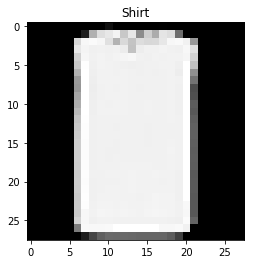

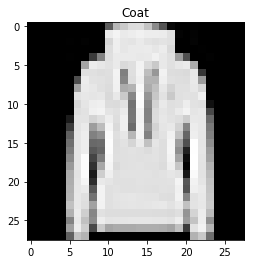

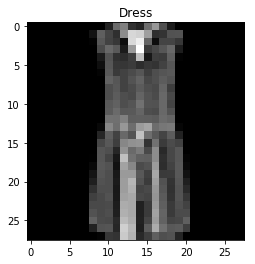

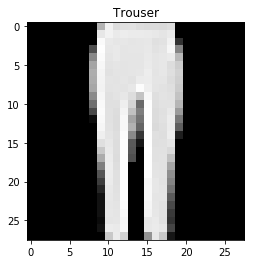

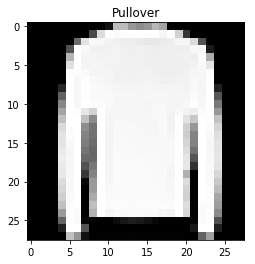

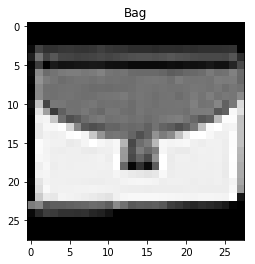

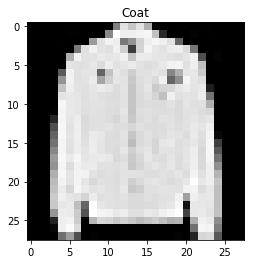

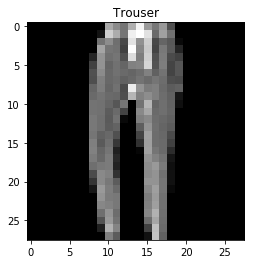

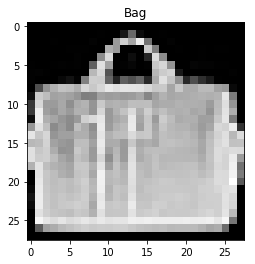

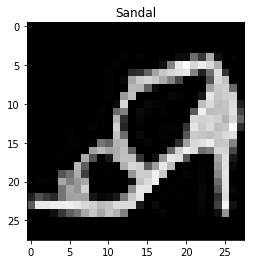

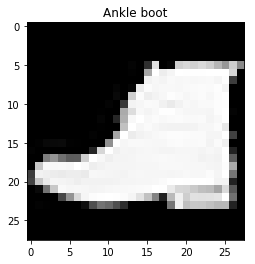

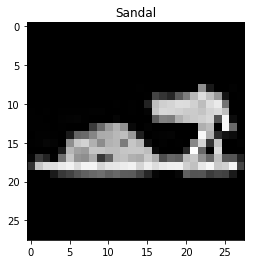

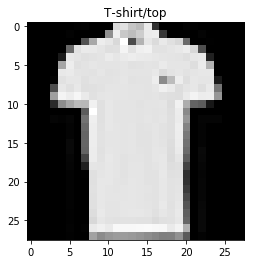

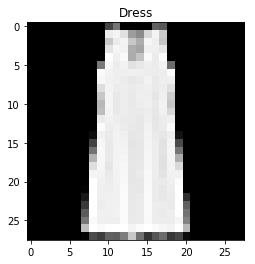

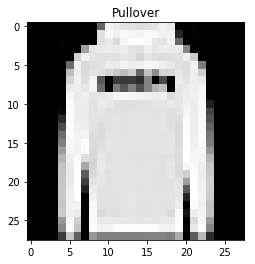

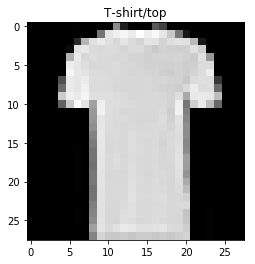

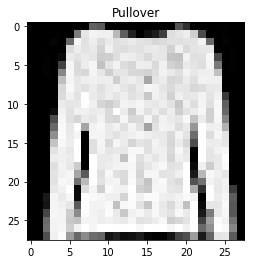

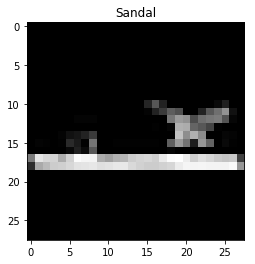

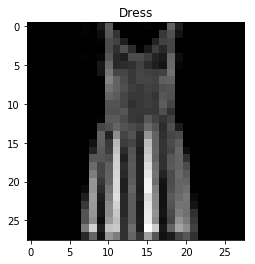

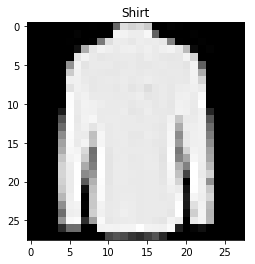

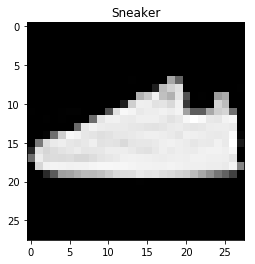

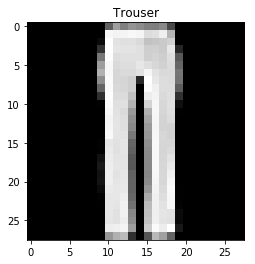

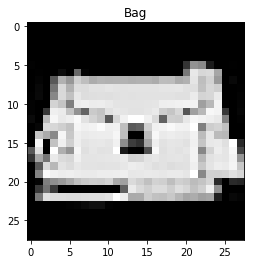

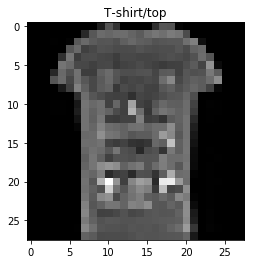

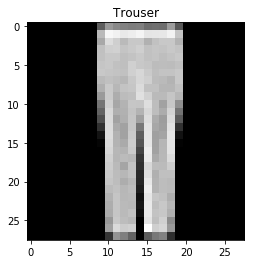

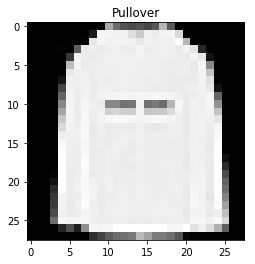

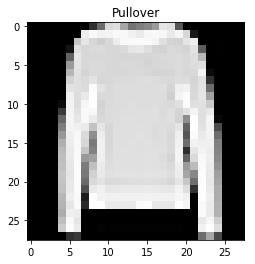

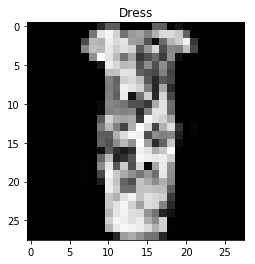

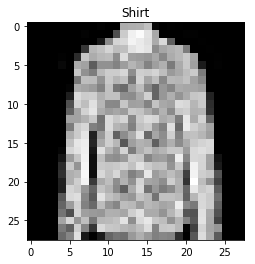

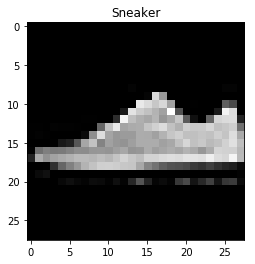

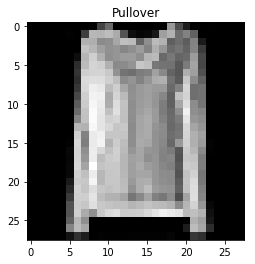

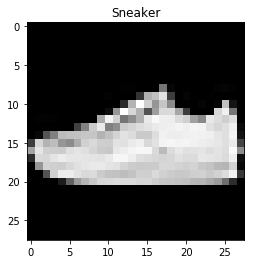

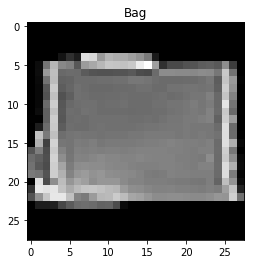

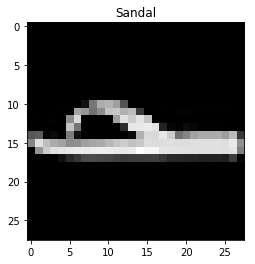

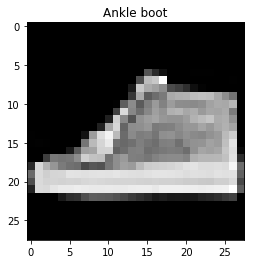

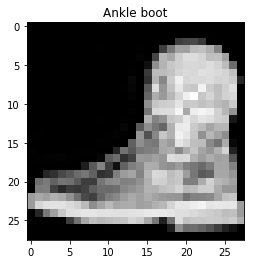

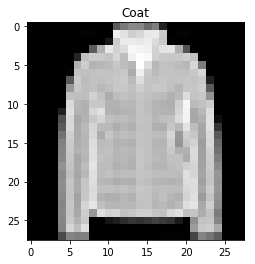

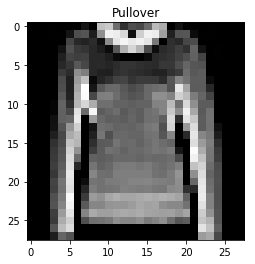

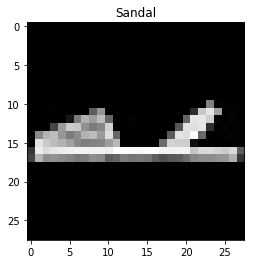

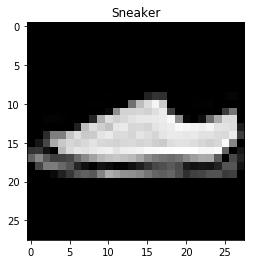

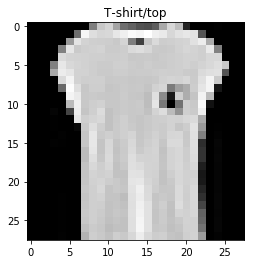

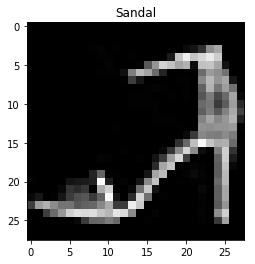

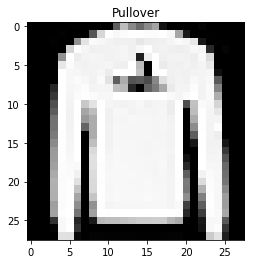

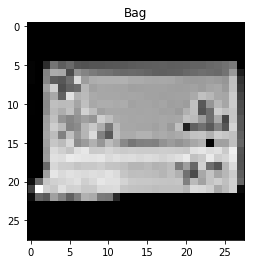

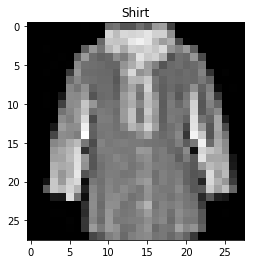

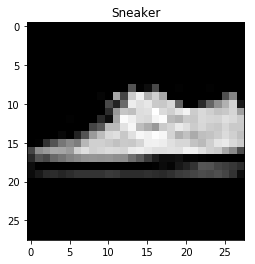

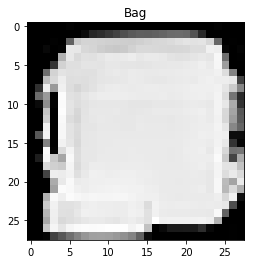

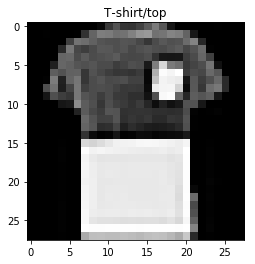

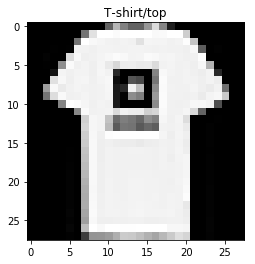

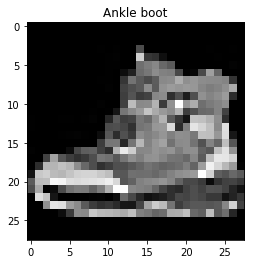

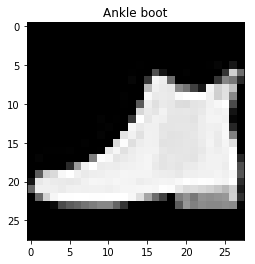

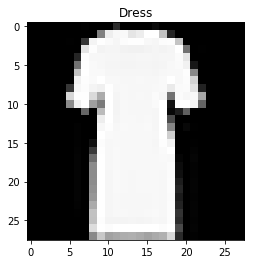

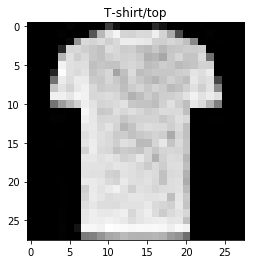

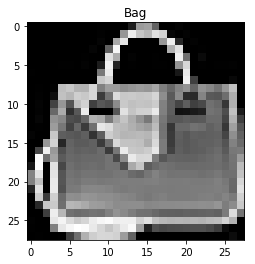

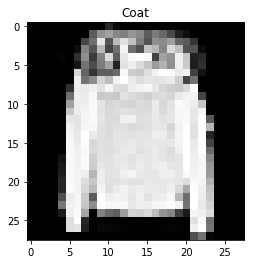

In [51]:
model.eval()
preds = model.forward(images)
preds = preds.max(dim=1)[1]

for i,img in enumerate(images):
    plt.title(classes[preds[i]])
    plt.imshow(img[0],cmap = "Greys_r")
    plt.show()

# Visualizing Weights

In [69]:
test_data= datasets.FashionMNIST(root = "./data", train=False,transform=transforms.ToTensor(),download=True)
test_loader =  DataLoader(test_data,batch_size=100000000)

In [92]:
images,labels = next(iter(test_loader))

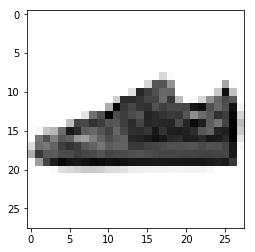

In [100]:
image =np.array(images[22][0]*255,dtype = "uint8")
plt.imshow(image,cmap="Greys")

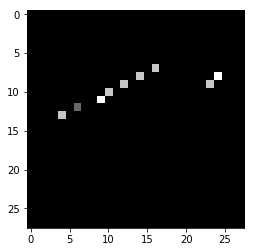

In [101]:
filters = model[3].weight.data

for f in filters:
    f = f[0].numpy()
    filtered = cv2.filter2D(image,-1,f)
    plt.imshow(filtered,cmap = "Greys_r")